['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


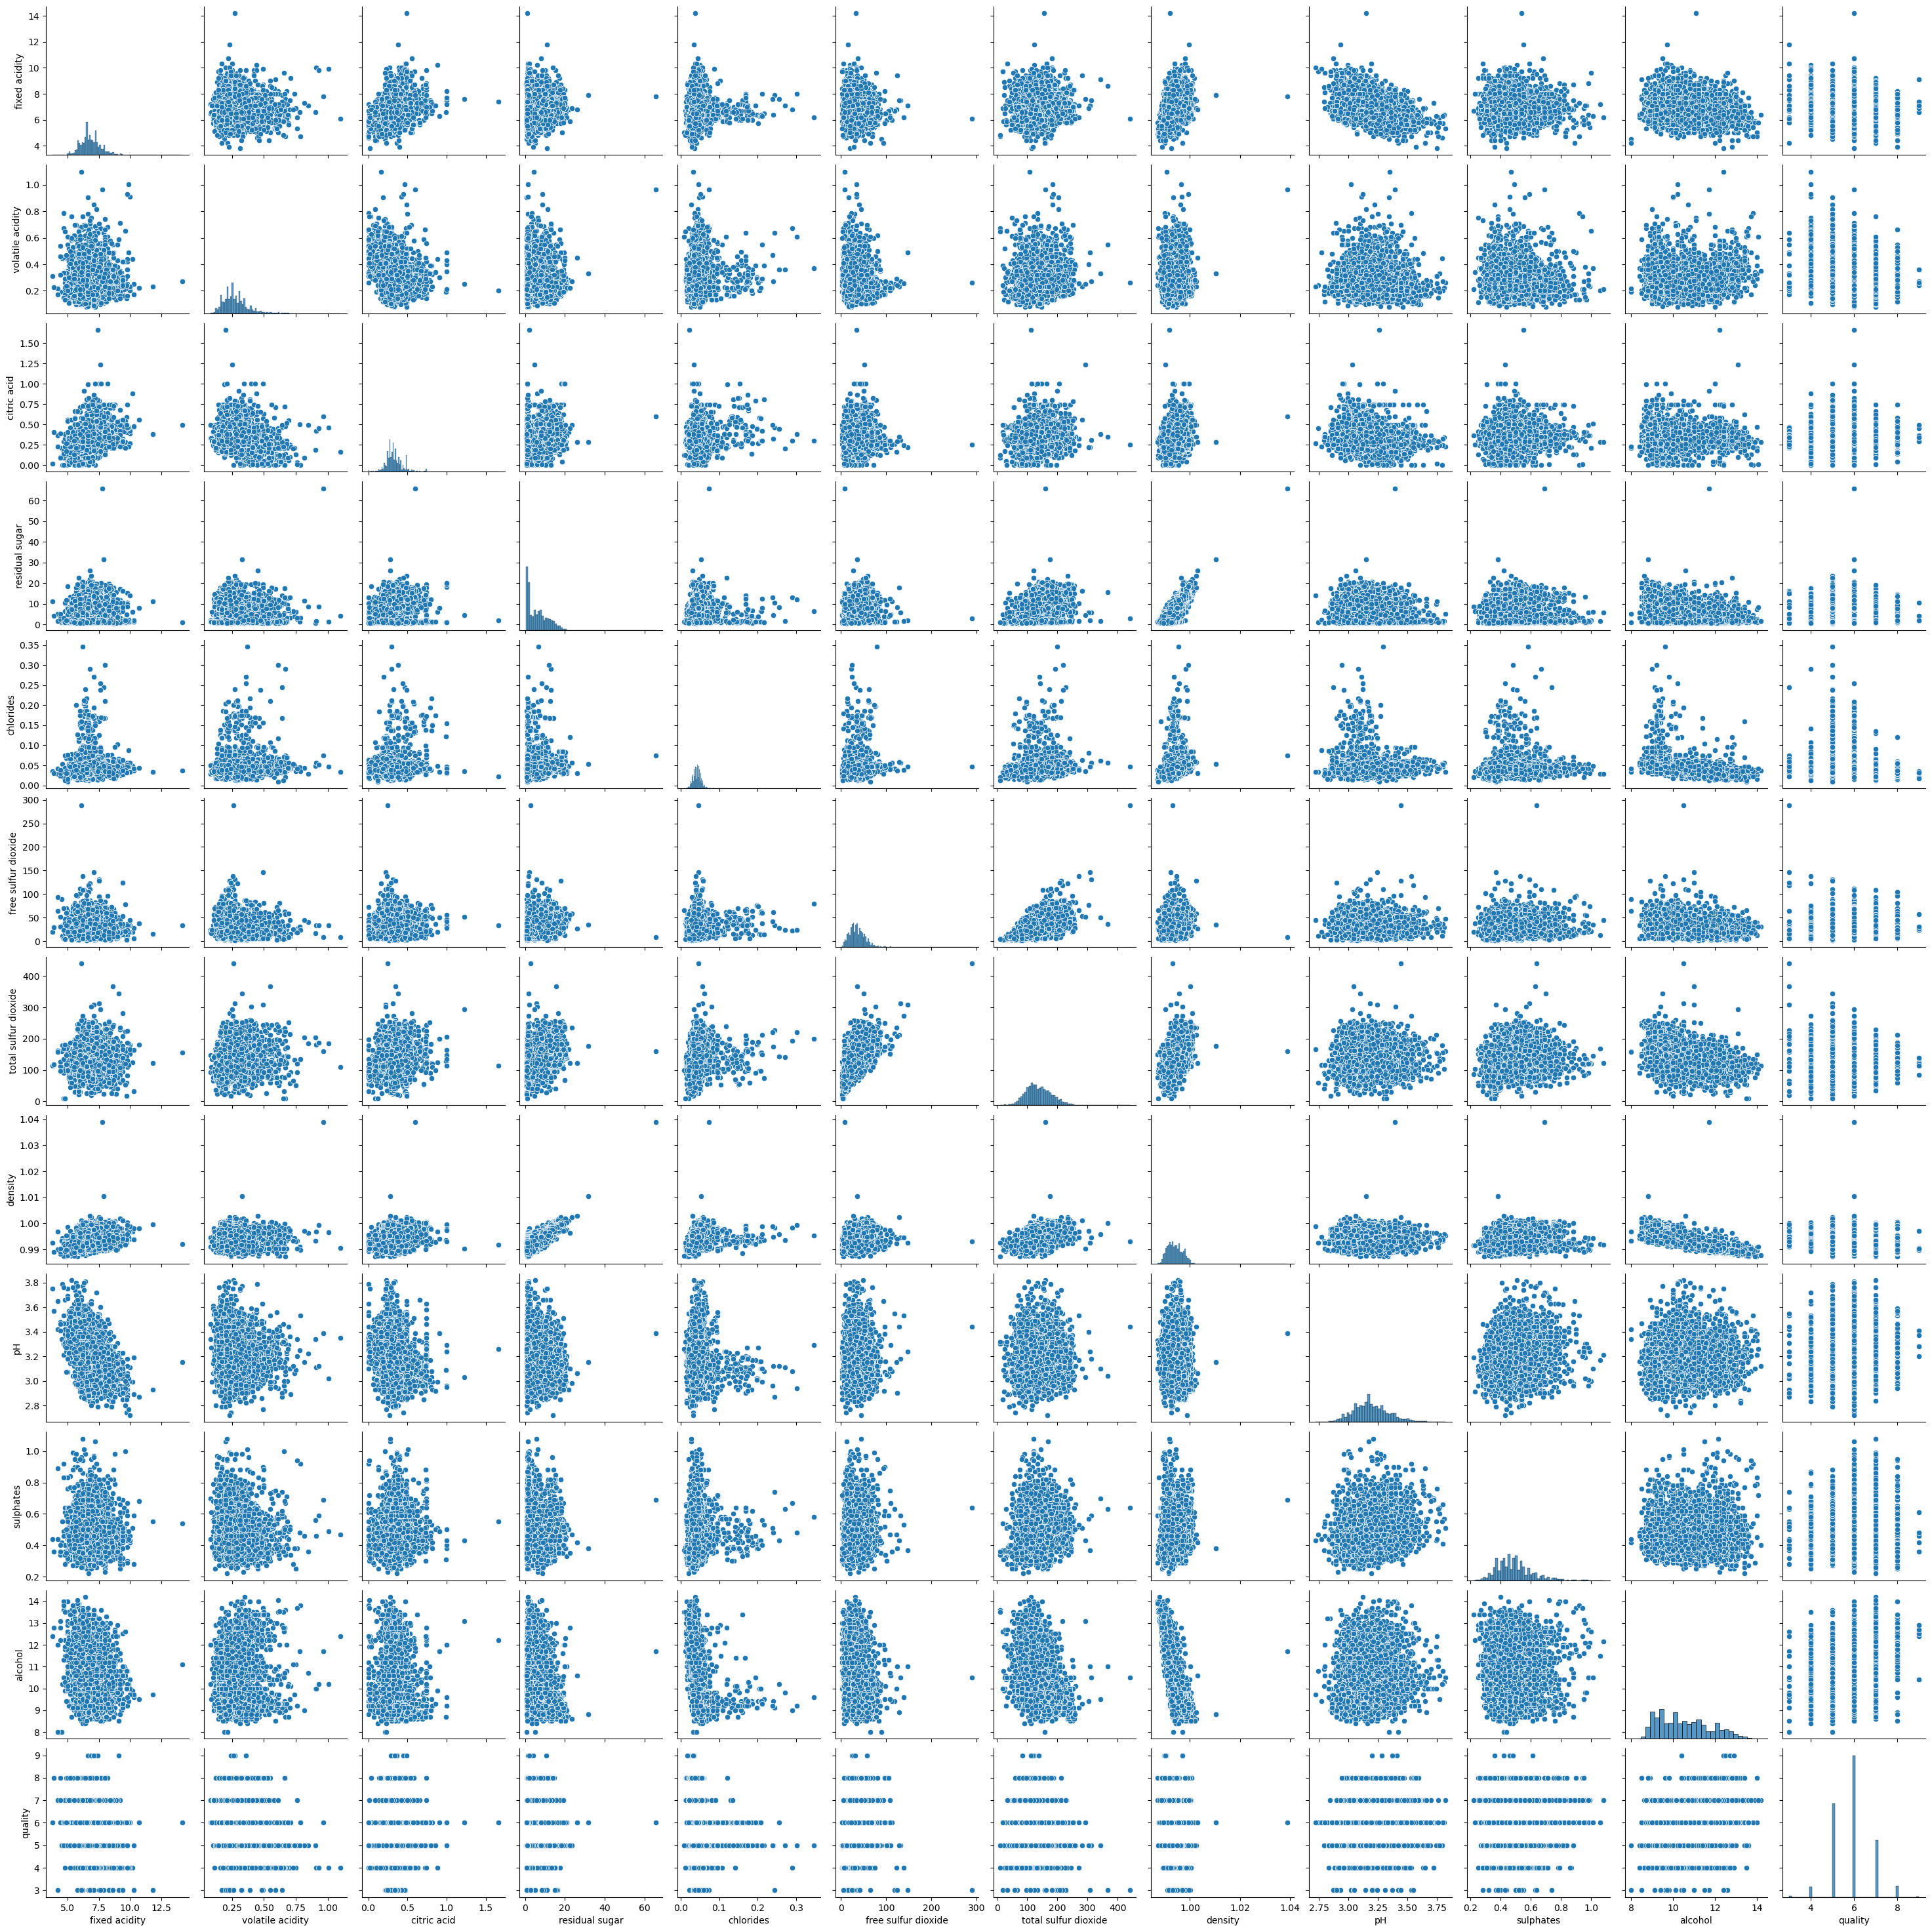

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('winequality-white.csv', delimiter=';')
print(df.columns.values)

# Построение матрицы графиков рассеивания с разделением колонок
sns.pairplot(df)
plt.show()
# добавить данные для датасета трудно, так как данные - химические характеристики вина
# поэтому сразу перейдем к очистке данных

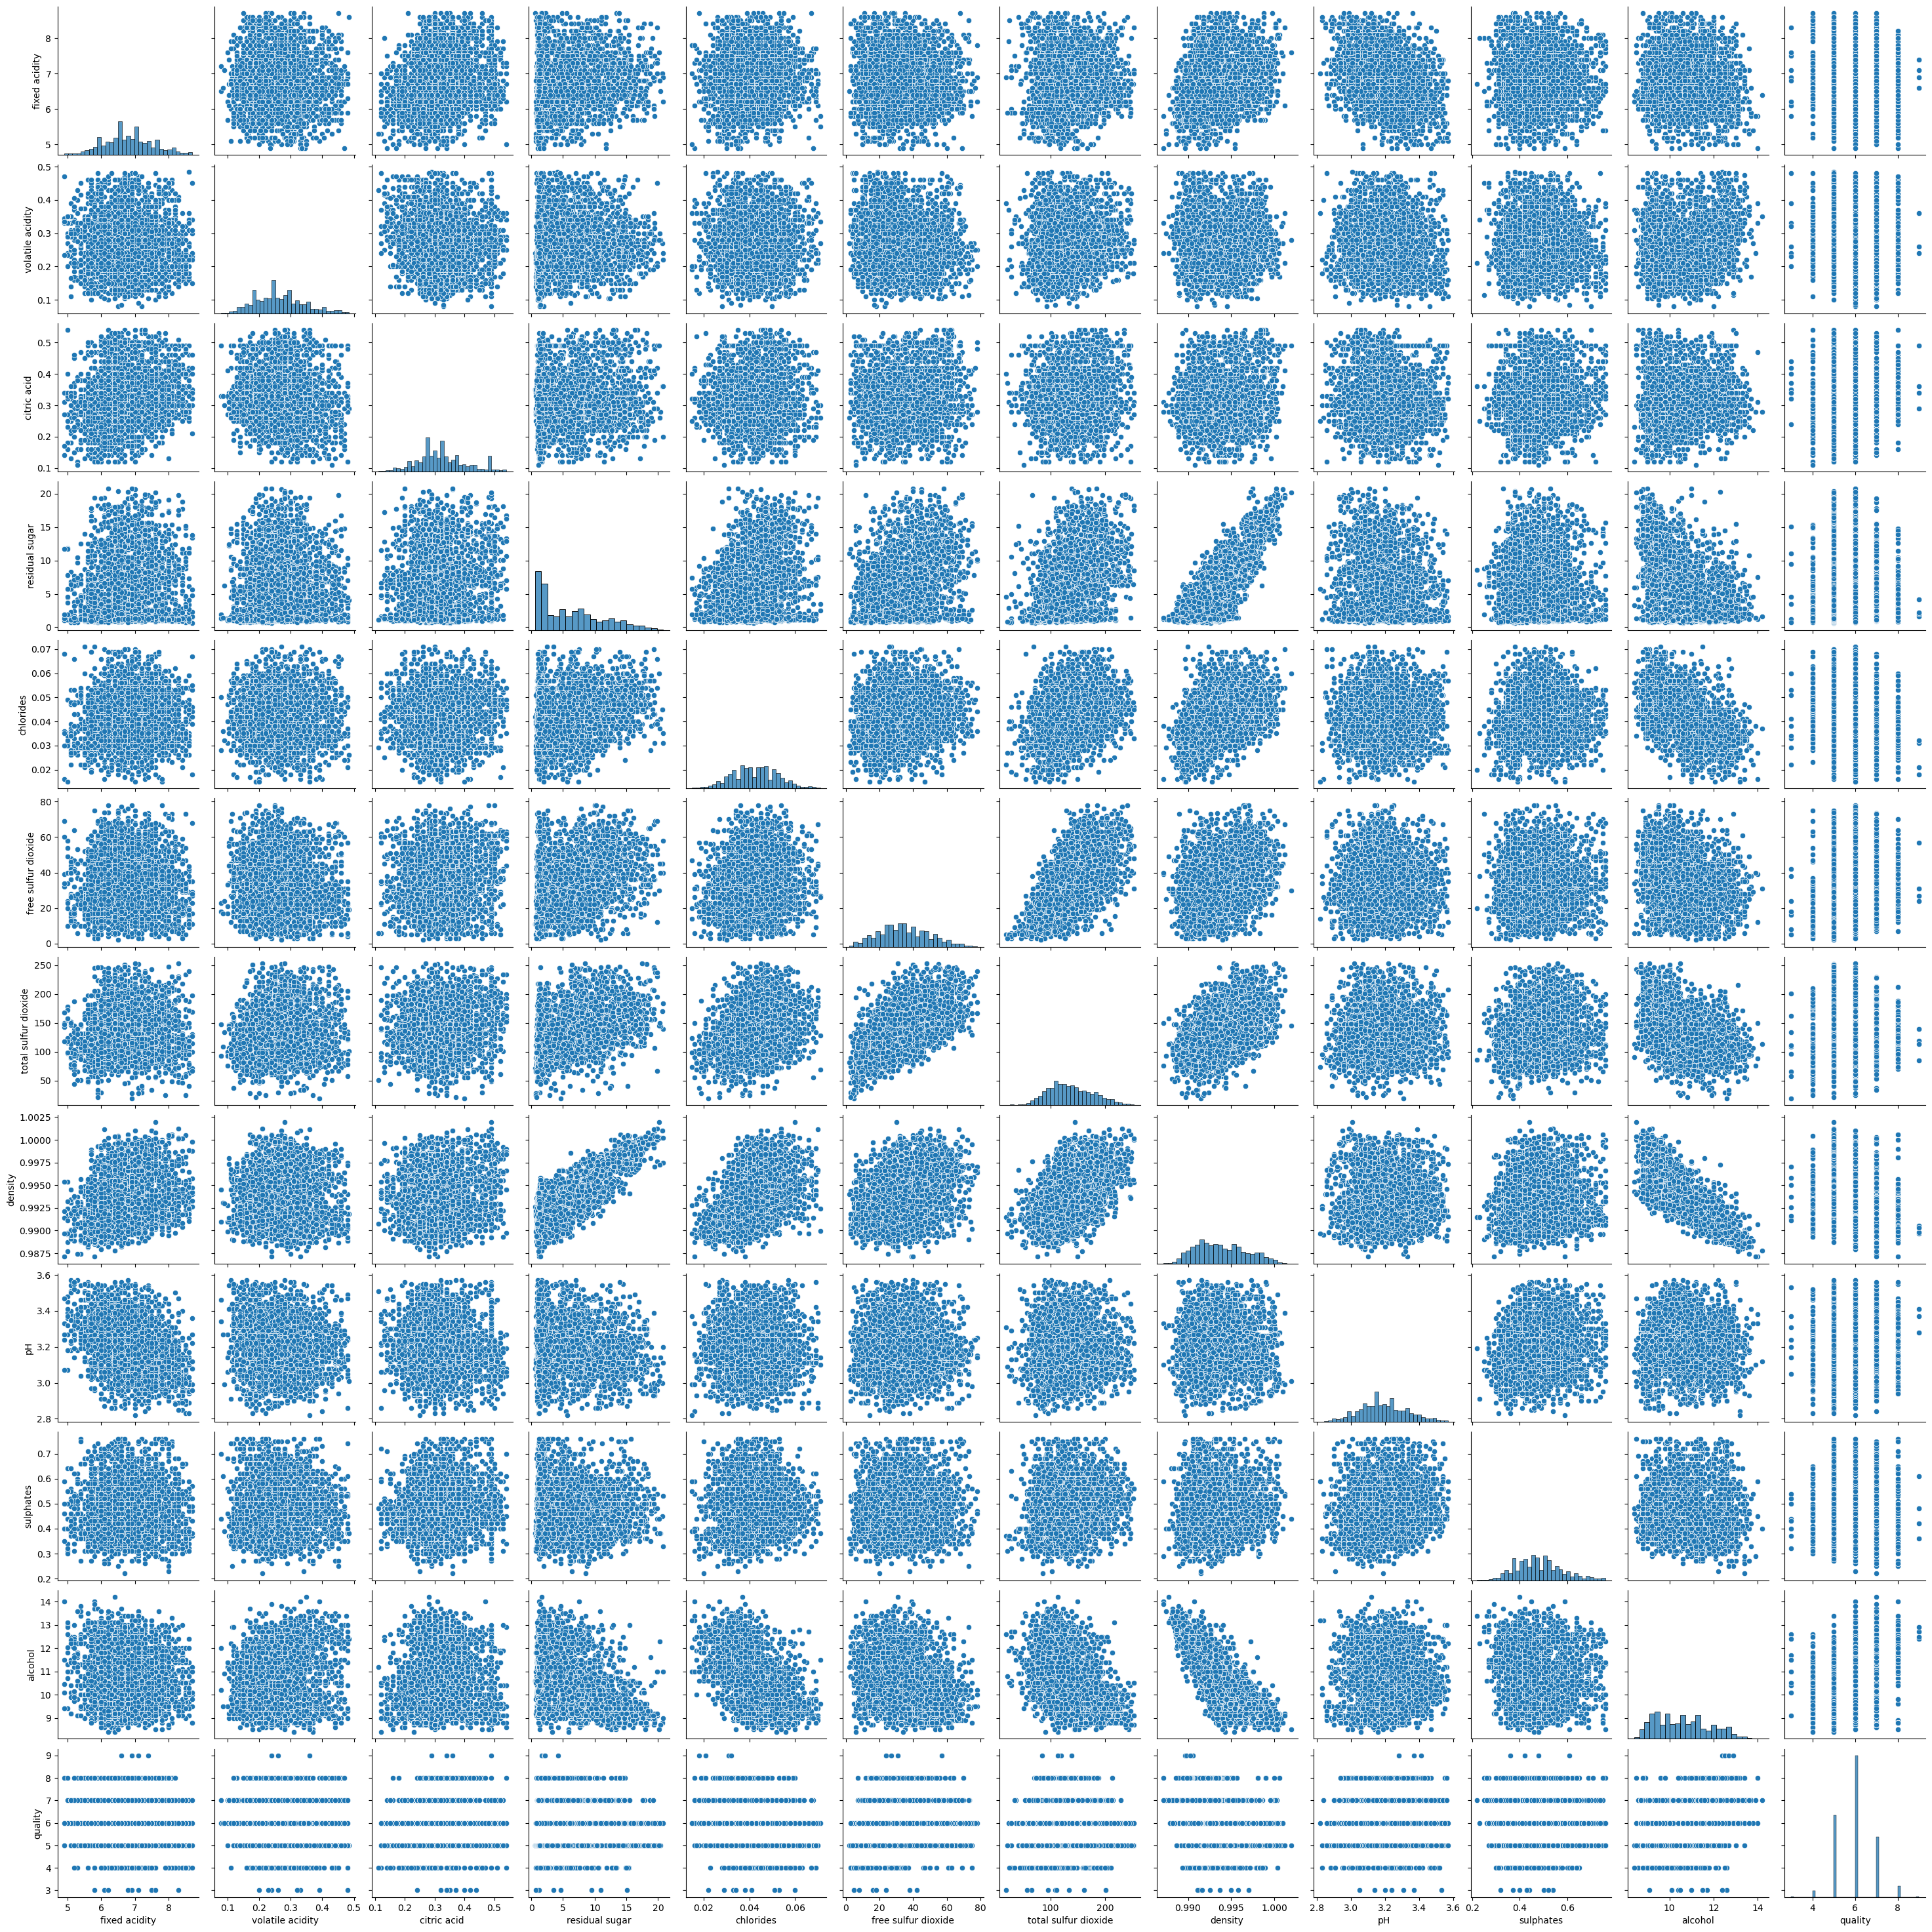

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Identify duplicates and remove them
unique_wine_quality = df.drop_duplicates(subset=['quality'], keep="first")

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

# Remove outliers for each specified column (except target)
for col in df.loc[:, df.columns != 'quality']:
    df = remove_outliers_iqr(df, col)
    
df.to_csv('cleaned_wine_quality_dataset.csv', index=False)

# Построение матрицы графиков рассеивания с разделением колонок
sns.pairplot(df)
plt.show()

C:\Users\kordy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


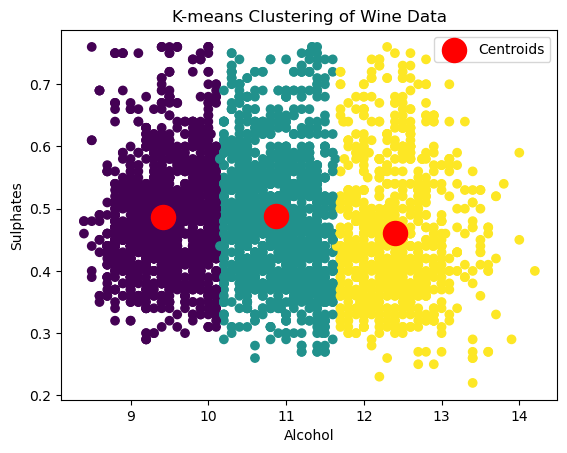

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example of using clustering on 2 variables
# Here it is useless, but later k-means clustering will be helpful

df_saved = df

# Select the features for clustering
X = df[['alcohol', 'sulphates']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Add the predicted clusters to the dataframe
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['alcohol'], df['sulphates'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('K-means Clustering of Wine Data')
plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.legend()
plt.show()

In [4]:
## Вывод
##
## Атрибуты нет смысла добавлять, так как данные из химии, трудно придумать производные данные для них
## Дубли и выбросы убраны, что значительно улучшило качество данных.
## Данные в основном линейные и мало зависят друг от друга. разве что
## residual sugar - density
## alcohol - density
## имеют явную линейную корреляцию
##
## алгоритм k-means был использован на 2-х колонках для визуализации
## далее предстоит сравнить работу алгоритма классификации с k-means и без него
##
##
##